<a href="https://colab.research.google.com/github/ericttran3/yfinance-web-scraper/blob/main/colab/yfinance_web_scraper_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yahoo Finance Web Scraper

This notebook demonstrates how to use the yfinance python libary to access all stock related information from https://finance.yahoo.com/. 

### Install Libaries

In [ ]:
!pip install yfinance --quiet

     |████████████████████████████████| 6.3MB 29.9MB/s 


### Import Libaries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from datetime import datetime
import time
import random
from IPython.core.display import HTML, display

import yfinance as yf

### Configure Jupyter Enviornment

In [ ]:
%matplotlib inline

pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_colwidth', 255)

display(HTML("<style>.container {width:85%} </style>"))

### Retrieve Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
nasdaq_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/nasdaq_screener_06-11-2021.csv')
nasdaq_df

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$143.53,0.47,0.329%,4.355321e+10,United States,1999.0,967688,Capital Goods,Electrical Products
1,AA,Alcoa Corporation Common Stock,$37.38,-0.04,-0.107%,6.979771e+09,NaN,2016.0,4624760,Basic Industries,Metal Fabrications
2,AAC,Ares Acquisition Corporation Class A Ordinary Shares,$9.80,0.01,0.102%,1.225000e+09,NaN,2021.0,22105,Finance,Business Services
3,AACG,ATA Creativity Global American Depositary Shares,$3.19,-0.03,-0.932%,1.011268e+08,China,NaN,29375,Miscellaneous,Service to the Health Industry
4,AACQ,Artius Acquisition Inc. Class A Common Stock,$9.99,-0.02,-0.20%,9.047194e+08,United States,2020.0,1412574,Basic Industries,Major Chemicals
...,...,...,...,...,...,...,...,...,...,...,...
7828,ZWRKW,Z-Work Acquisition Corp. Warrant,$0.75,0.07,10.294%,0.000000e+00,United States,2021.0,25078,Finance,Business Services
7829,ZY,Zymergen Inc. Common Stock,$44.06,0.71,1.638%,4.420309e+09,United States,2021.0,233900,Health Care,Biotechnology: Commercial Physical & Biological Resarch
7830,ZYME,Zymeworks Inc. Common Shares,$37.73,0.15,0.399%,1.741995e+09,Canada,2017.0,534438,NaN,NaN
7831,ZYNE,Zynerba Pharmaceuticals Inc. Common Stock,$5.64,0.22,4.059%,2.326587e+08,United States,2015.0,2022574,Health Care,Major Pharmaceuticals


In [11]:
companies = nasdaq_df[~nasdaq_df['Name'].str.contains("ETF") & (nasdaq_df['Market Cap'] > 0) & (nasdaq_df['IPO Year'] > 0) & 
                              (nasdaq_df['Country'].notnull())].sort_values('Market Cap', ascending=False)
companies

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
17,AAPL,Apple Inc. Common Stock,$127.35,1.2400,0.983%,2.207910e+12,United States,1980.0,52881717,Technology,Computer Manufacturing
4741,MSFT,Microsoft Corporation Common Stock,$257.89,0.6500,0.253%,1.942318e+12,United States,1986.0,18798000,Technology,Computer Software: Prepackaged Software
445,AMZN,Amazon.com Inc. Common Stock,$3346.83,-2.8200,-0.084%,1.687886e+12,United States,1997.0,2799811,Consumer Services,Catalog/Specialty Distribution
3160,GOOG,Alphabet Inc. Class C Capital Stock,$2513.93,-7.6700,-0.304%,1.684745e+12,United States,2004.0,1138783,Technology,Internet and Information Services
2558,FB,Facebook Inc. Class A Common Stock,$331.26,-1.2000,-0.361%,9.392761e+11,United States,2012.0,13526101,Technology,Internet and Information Services
...,...,...,...,...,...,...,...,...,...,...,...
498,APOP,Cellect Biotechnology Ltd. American Depositary Shares,$3.04,-0.1200,-3.797%,1.188485e+07,Israel,2016.0,62503,Health Care,Medical/Dental Instruments
2545,FAMI,Farmmi Inc. Ordinary Shares,$0.535,0.0009,0.169%,1.097697e+07,China,2018.0,29641822,Consumer Non-Durables,Packaged Foods
3977,KBSF,KBS Fashion Group Limited Common Stock,$4.01,0.1800,4.70%,1.039111e+07,China,2013.0,287822,Consumer Non-Durables,Apparel
1829,CTIB,Yunhong CTI Ltd. Common Stock,$1.96,0.0300,1.554%,8.809432e+06,United States,1997.0,112783,Miscellaneous,Diversified Commercial Services


In [12]:
companies.shape

(3039, 11)

In [ ]:
tickers = list(companies['Symbol'])
tickers

In [ ]:
list(enumerate(tickers))

In [16]:
len(tickers)

3039

In [ ]:

for stock in enumerate(tickers):
  print(stock[0], stock[1])

In [29]:
stocks = []

# Track how long python script takes to execute
start_time = time.time()
timeout = start_time + 15 # [seconds]

for stock in enumerate(tickers):
    try:
        if time.time() > timeout:
            print("Execution time: {} Seconds".format(round(time.time() - start_time))) 
            break
        else:
            print(stock)
            stock = yf.Ticker(stock[1])
            data = stock.info
            stocks.append(data)
            time.sleep(1)
    except:
        pass

(0, 'AAPL')
(1, 'MSFT')
(2, 'AMZN')
Execution time: 16 Seconds


In [ ]:
stocks[1:5]

In [ ]:
columns = ['zip', 'sector', 'fullTimeEmployees', 'longBusinessSummary', 'city', 'phone', 'state', 'country', 'companyOfficers', 'website', 'maxAge', 'address1', 
           'industry', 'previousClose', 'regularMarketOpen', 'twoHundredDayAverage', 'trailingAnnualDividendYield', 'payoutRatio', 'volume24Hr', 'regularMarketDayHigh', 'navPrice', 
           'averageDailyVolume10Day', 'totalAssets', 'regularMarketPreviousClose', 'fiftyDayAverage', 'trailingAnnualDividendRate', 'open', 'toCurrency', 'averageVolume10days', 
           'expireDate', 'yield', 'algorithm', 'dividendRate', 'exDividendDate', 'beta', 'circulatingSupply', 'startDate', 'regularMarketDayLow', 'priceHint', 'currency', 'trailingPE', 
           'regularMarketVolume', 'lastMarket', 'maxSupply', 'openInterest', 'marketCap', 'volumeAllCurrencies', 'strikePrice', 'averageVolume', 'priceToSalesTrailing12Months', 'dayLow', 
           'ask', 'ytdReturn', 'askSize', 'volume', 'fiftyTwoWeekHigh', 'forwardPE', 'fromCurrency', 'fiveYearAvgDividendYield', 'fiftyTwoWeekLow', 'bid', 'tradeable', 'dividendYield', 
           'bidSize', 'dayHigh', 'exchange', 'shortName', 'longName', 'exchangeTimezoneName', 'exchangeTimezoneShortName', 'isEsgPopulated', 'gmtOffSetMilliseconds', 'quoteType', 'symbol', 
           'messageBoardId', 'market', 'annualHoldingsTurnover', 'enterpriseToRevenue', 'beta3Year', 'profitMargins', 'enterpriseToEbitda', '52WeekChange', 'morningStarRiskRating', 
           'forwardEps', 'revenueQuarterlyGrowth', 'sharesOutstanding', 'fundInceptionDate', 'annualReportExpenseRatio', 'bookValue', 'sharesShort', 'sharesPercentSharesOut', 'fundFamily', 
           'lastFiscalYearEnd', 'heldPercentInstitutions', 'netIncomeToCommon', 'trailingEps', 'lastDividendValue', 'SandP52WeekChange', 'priceToBook', 'heldPercentInsiders', 'nextFiscalYearEnd', 
           'mostRecentQuarter', 'shortRatio', 'sharesShortPreviousMonthDate', 'floatShares', 'enterpriseValue', 'threeYearAverageReturn', 'lastSplitDate', 'lastSplitFactor', 'legalType', 
           'lastDividendDate', 'morningStarOverallRating', 'earningsQuarterlyGrowth', 'dateShortInterest', 'pegRatio', 'lastCapGain', 'shortPercentOfFloat', 'sharesShortPriorMonth', 
           'impliedSharesOutstanding', 'category', 'fiveYearAverageReturn', 'regularMarketPrice', 'logo_url']

In [ ]:
df = pd.DataFrame(data=stocks, columns=columns)
df

In [ ]:
df.shape

(2967, 123)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2967 entries, 0 to 2966
Columns: 123 entries, zip to logo_url
dtypes: float64(96), object(27)
memory usage: 2.8+ MB


In [ ]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
fullTimeEmployees,2179.0,7.580990e+03,3.982490e+04,1.000000e+00,1.235000e+02,7.000000e+02,3.480500e+03,1.271000e+06
maxAge,2962.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
previousClose,2962.0,4.697000e+01,1.386300e+02,5.000000e-01,9.690000e+00,1.592000e+01,4.051000e+01,3.762000e+03
regularMarketOpen,2962.0,4.721000e+01,1.390900e+02,4.900000e-01,9.690000e+00,1.596000e+01,4.077000e+01,3.772170e+03
twoHundredDayAverage,2962.0,4.584000e+01,1.337400e+02,6.400000e-01,9.730000e+00,1.544000e+01,3.985000e+01,3.444890e+03
trailingAnnualDividendYield,951.0,4.300000e-01,6.940000e+00,0.000000e+00,1.000000e-02,2.000000e-02,5.000000e-02,1.557900e+02
payoutRatio,2476.0,5.000000e-01,3.310000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e-01,1.079000e+02
volume24Hr,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
regularMarketDayHigh,2962.0,4.787000e+01,1.398900e+02,5.100000e-01,9.720000e+00,1.619000e+01,4.152000e+01,3.772170e+03
navPrice,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

### Data Enrichment

In [ ]:
df['updated_date'] = datetime.today().date()
df['exDividendDate'] = pd.to_datetime(df['exDividendDate'], unit='s', origin='unix')
df['startDate'] = pd.to_datetime(df['startDate'], unit='s', origin='unix')
df['fundInceptionDate'] = pd.to_datetime(df['fundInceptionDate'], unit='s', origin='unix')
df['lastFiscalYearEnd'] = pd.to_datetime(df['lastFiscalYearEnd'], unit='s', origin='unix')
df['nextFiscalYearEnd'] = pd.to_datetime(df['nextFiscalYearEnd'], unit='s', origin='unix')
df['mostRecentQuarter'] = pd.to_datetime(df['mostRecentQuarter'], unit='s', origin='unix')
df['sharesShortPreviousMonthDate'] = pd.to_datetime(df['sharesShortPreviousMonthDate'], unit='s', origin='unix')
df['lastSplitDate'] = pd.to_datetime(df['lastSplitDate'], unit='s', origin='unix')
df['lastDividendDate'] = pd.to_datetime(df['lastDividendDate'], unit='s', origin='unix')

In [ ]:
df.sample(5)

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,website,maxAge,address1,industry,previousClose,regularMarketOpen,twoHundredDayAverage,trailingAnnualDividendYield,payoutRatio,volume24Hr,regularMarketDayHigh,navPrice,averageDailyVolume10Day,totalAssets,regularMarketPreviousClose,fiftyDayAverage,trailingAnnualDividendRate,open,toCurrency,averageVolume10days,expireDate,yield,algorithm,dividendRate,exDividendDate,beta,circulatingSupply,startDate,regularMarketDayLow,priceHint,currency,trailingPE,regularMarketVolume,lastMarket,maxSupply,openInterest,marketCap,volumeAllCurrencies,strikePrice,averageVolume,priceToSalesTrailing12Months,dayLow,ask,ytdReturn,askSize,volume,fiftyTwoWeekHigh,forwardPE,fromCurrency,fiveYearAvgDividendYield,fiftyTwoWeekLow,bid,tradeable,dividendYield,bidSize,dayHigh,exchange,shortName,longName,exchangeTimezoneName,exchangeTimezoneShortName,isEsgPopulated,gmtOffSetMilliseconds,quoteType,symbol,messageBoardId,market,annualHoldingsTurnover,enterpriseToRevenue,beta3Year,profitMargins,enterpriseToEbitda,52WeekChange,morningStarRiskRating,forwardEps,revenueQuarterlyGrowth,sharesOutstanding,fundInceptionDate,annualReportExpenseRatio,bookValue,sharesShort,sharesPercentSharesOut,fundFamily,lastFiscalYearEnd,heldPercentInstitutions,netIncomeToCommon,trailingEps,lastDividendValue,SandP52WeekChange,priceToBook,heldPercentInsiders,nextFiscalYearEnd,mostRecentQuarter,shortRatio,sharesShortPreviousMonthDate,floatShares,enterpriseValue,threeYearAverageReturn,lastSplitDate,lastSplitFactor,legalType,lastDividendDate,morningStarOverallRating,earningsQuarterlyGrowth,dateShortInterest,pegRatio,lastCapGain,shortPercentOfFloat,sharesShortPriorMonth,impliedSharesOutstanding,category,fiveYearAverageReturn,regularMarketPrice,logo_url,updated_date
371,77042,Energy,NaN,"Phillips 66 Partners LP owns, operates, develops, and acquires midstream assets. It offers transportation, terminaling, processing, stevedoring, storage, and fractionation of crude oil, refined petroleum products, and natural gas liquids. The company ...",Houston,855-283-9237,TX,United States,[],http://www.phillips66partners.com,1.0,2331 CityWest Boulevard,Oil & Gas Midstream,40.77,40.99,30.67963,0.085847,1.5837,NaN,40.8400,NaN,626800.0,NaN,40.77,36.770294,3.50,40.99,NaN,626800.0,NaN,NaN,NaN,3.50,2021-04-29,1.174848,NaN,NaT,39.620,2.0,USD,17.983688,701621.0,NaN,NaN,NaN,9.062815e+09,NaN,NaN,917782.0,8.85041,39.620,39.90,NaN,900.0,701621.0,48.07,9.540865,NaN,6.68,21.28,39.71,False,0.1024,800.0,40.8400,NYQ,Phillips 66 Partners LP,Phillips 66 Partners LP,America/New_York,EDT,False,-14400000,EQUITY,PSXP,finmb_233582617,us_market,NaN,12.489,NaN,0.53418,22.436,NaN,NaN,4.16,NaN,228340000.0,NaT,NaN,7.957,4247316.0,0.0186,NaN,2020-12-31,0.21070,504000000.0,2.207,NaN,NaN,4.988061,0.74434,2022-12-31,2021-03-31,4.09,2021-03-15,58377442.0,1.278852e+10,NaN,NaT,None,NaN,NaT,NaN,NaN,1.618445e+09,0.52,NaN,0.0728,3063128.0,NaN,NaN,NaN,39.69,https://logo.clearbit.com/phillips66partners.com,2021-06-07
238,94925,Consumer Cyclical,4500.0,"RH, together with its subsidiaries, operates as a retailer in the home furnishings. It offers products in various categories, including furniture, lighting, textiles, bathware, dÃ©cor, outdoor and garden, and child and teen furnishings. The company pr...",Corte Madera,415 924 1005,CA,United States,[],http://www.rh.com,1.0,15 Koch Road,Specialty Retail,611.54,615.00,533.87140,NaN,0.0000,NaN,618.0999,NaN,396560.0,NaN,611.54,654.043800,NaN,615.00,NaN,396560.0,NaN,NaN,NaN,NaN,NaT,2.502482,NaN,NaT,602.220,2.0,USD,61.568270,404273.0,NaN,NaN,NaN,1.287566e+10,NaN,NaN,561973.0,4.51995,602.220,614.50,NaN,1100.0,404273.0,733.05,26.273350,NaN,NaN,226.82,612.05,False,NaN,800.0,618.0999,NYQ,RH,RH,America/New_York,EDT,False,-14400000,EQUITY,RH,finmb_53839639,us_market,NaN,5.599,NaN,0.09542,22.359,NaN,NaN,23.34,NaN,20996800.0,NaT,NaN,21.292,2428145.0,0.1156,NaN,2021-01-30,0.93954,271815008.0,9.960,NaN,NaN,28.800488,0.10254,2023-01-3

### Save to Local

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/yfinance-us-stock-tickers_{}.csv'.format(datetime.today().date()), index=False)

### Load from Google Drive

In [31]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/yfinance-us-stock-tickers_2021-06-07.csv')

### Save to Cloud

In [35]:
def load_google_cloudstorage(event, context):
    """
    Load files to google cloud storage
    """

    # Write file locally
    # df.to_csv('./truecar-auto-listings_{}.csv'.format(datetime.today().strftime("%Y-%m-%d")), index=False)

    client = storage.Client()
    bucket = client.get_bucket('mnd-web-scraper')
    bucket.blob('yfinance-web-scraper/raw/yfinance-us-stocks_{}.csv'.format(datetime.today().strftime("%Y-%m-%d"))).upload_from_string(df.to_csv(index=False), 'text/csv')
    print('File uploaded to GCP successfully.')

In [ ]:
load_google_cloudstorage(0,1)

### Create a Table in BigQuery

In [53]:
# Construct a BigQuery client object.
client = bigquery.Client()

# TODO(developer): Set table_id to the ID of the table to create.
table_id = "analytics-308800.web_scraper.pstg_yfinance_us_stocks_sdl"

schema=[
        bigquery.SchemaField("ZIP", "STRING"),
        bigquery.SchemaField("SECTOR", "STRING"),
        bigquery.SchemaField("FULL_TIME_EMPLOYEES", "STRING"),
        bigquery.SchemaField("LONG_BUSINESS_SUMMARY", "STRING"),
        bigquery.SchemaField("CITY", "STRING"),
        bigquery.SchemaField("PHONE", "STRING"),
        bigquery.SchemaField("STATE", "STRING"), 
        bigquery.SchemaField("COUNTRY", "STRING"),
        bigquery.SchemaField("COMPANY_OFFICERS", "STRING"),        
        bigquery.SchemaField("WEBSITE", "STRING"),    
        bigquery.SchemaField("MAX_AGE", "STRING"),       
        bigquery.SchemaField("ADDRESS_1", "STRING"),        
        bigquery.SchemaField("INDUSTRY", "STRING"),
        bigquery.SchemaField("PREVIOUS_CLOSE", "STRING"),
        bigquery.SchemaField("REGULAR_MARKET_OPEN", "STRING"),
        bigquery.SchemaField("TWO_HUNDRED_DAY_AVERAGE", "STRING"),
        bigquery.SchemaField("TRAILING_ANNUAL_DIVIDEND_YIELD", "STRING"),
        bigquery.SchemaField("PAYOUT_RATIO", "STRING"),
        bigquery.SchemaField("VOLUME_24_HR", "STRING"),
        bigquery.SchemaField("REGULAR_MARKET_DAY_HIGH", "STRING"),
        bigquery.SchemaField("NAV_PRICE", "STRING"),
        bigquery.SchemaField("AVERAGE_DAILY_VOLUME_10_DAY", "STRING"),
        bigquery.SchemaField("TOTAL_ASSETS", "STRING"),
        bigquery.SchemaField("REGULAR_MARKET_PREVIOUS_CLOSE", "STRING"),
        bigquery.SchemaField("FIFTY_DAY_AVERAGE", "STRING"),
        bigquery.SchemaField("TRAILING_ANNUAL_DIVIDEND_RATE", "STRING"),
        bigquery.SchemaField("OPEN", "STRING"),
        bigquery.SchemaField("TO_CURRENCY", "STRING"),
        bigquery.SchemaField("AVERAGE_VOLUME_10_DAYS", "STRING"),
        bigquery.SchemaField("EXPIRE_DATE", "STRING"),
        bigquery.SchemaField("YIELD", "STRING"),
        bigquery.SchemaField("ALGORITHM", "STRING"),
        bigquery.SchemaField("DIVIDEND", "STRING"),
        bigquery.SchemaField("EX_DIVIDEND_DATE", "STRING"),
        bigquery.SchemaField("BETA", "STRING"),
        bigquery.SchemaField("CIRCULATING_SUPPLY", "STRING"),
        bigquery.SchemaField("START_DATE", "STRING"),
        bigquery.SchemaField("REGULAR_MARKET_DAY_LOW", "STRING"),
        bigquery.SchemaField("PRICE_HINT", "STRING"),
        bigquery.SchemaField("CURRENCY", "STRING"),
        bigquery.SchemaField("TRAILING_PE", "STRING"),
        bigquery.SchemaField("REGULAR_MARKET_VOLUME", "STRING"),
        bigquery.SchemaField("LAST_MARKET", "STRING"),
        bigquery.SchemaField("MAX_SUPPLY", "STRING"),
        bigquery.SchemaField("OPEN_INTEREST", "STRING"),
        bigquery.SchemaField("MARKET_CAP", "STRING"),
        bigquery.SchemaField("VOLUME_ALL_CURRENCIES", "STRING"),
        bigquery.SchemaField("STRIKE_PRICE", "STRING"),
        bigquery.SchemaField("AVERAGE_VOLUME", "STRING"),
        bigquery.SchemaField("PRICE_TO_SALES_TRAILING_12_MONTHS", "STRING"),
        bigquery.SchemaField("DAY_LOW", "STRING"),
        bigquery.SchemaField("ASK", "STRING"),
        bigquery.SchemaField("YTD_RETURN", "STRING"),
        bigquery.SchemaField("ASK_SIZE", "STRING"),
        bigquery.SchemaField("VOLUME", "STRING"),
        bigquery.SchemaField("FIFTY_TWO_WEEK_HIGH", "STRING"),
        bigquery.SchemaField("FORWARD_PE", "STRING"),
        bigquery.SchemaField("FROM_CURRENCY", "STRING"),
        bigquery.SchemaField("FIVE_YEAR_AVG_DIVIDEND_YIELD", "STRING"),
        bigquery.SchemaField("FIFTY_TWO_WEEK_LOW", "STRING"),
        bigquery.SchemaField("BID", "STRING"),
        bigquery.SchemaField("TRADEABLE", "STRING"),
        bigquery.SchemaField("DIVIDEND_YIELD", "STRING"),
        bigquery.SchemaField("BID_SIZE", "STRING"),
        bigquery.SchemaField("DAY_HIGH", "STRING"),
        bigquery.SchemaField("EXCHANGE", "STRING"),
        bigquery.SchemaField("SHORT_NAME", "STRING"),
        bigquery.SchemaField("LONG_NAME", "STRING"),
        bigquery.SchemaField("EXCHANGE_TIMEZONE_NAME", "STRING"),
        bigquery.SchemaField("EXCHANGE_TIMEZONE_SHORT_NAME", "STRING"),
        bigquery.SchemaField("IS_ESG_POPULATED", "STRING"),
        bigquery.SchemaField("GMT_OFFSET_MILLISECONDS", "STRING"),
        bigquery.SchemaField("QUOTE_TYPE", "STRING"),
        bigquery.SchemaField("SYMBOL", "STRING"),
        bigquery.SchemaField("MESSAGE_BOARD_ID", "STRING"),
        bigquery.SchemaField("MARKET", "STRING"),
        bigquery.SchemaField("ANNUAL_HOLDINGS_TURNOVER", "STRING"),
        bigquery.SchemaField("ENTERPRISE_TO_REVENUE", "STRING"),
        bigquery.SchemaField("BETA_3_YEAR", "STRING"),
        bigquery.SchemaField("PROFIT_MARGINS", "STRING"),
        bigquery.SchemaField("ENTERPRISE_TO_EBITDA", "STRING"),
        bigquery.SchemaField("FIFTY_TWO_CHANGE", "STRING"),
        bigquery.SchemaField("MORNINGSTAR_RISK_RATING", "STRING"),
        bigquery.SchemaField("FORWARD_EPS", "STRING"),
        bigquery.SchemaField("REVENUE_QUARTERLY_GROWTH", "STRING"),
        bigquery.SchemaField("SHARES_OUTSTANDING", "STRING"),
        bigquery.SchemaField("FUND_INCEPTION_DATE", "STRING"),
        bigquery.SchemaField("ANNUAL_REPORT_EXPENSE_RATTIO", "STRING"),
        bigquery.SchemaField("BOOK_VALUE", "STRING"),
        bigquery.SchemaField("SHARES_SHORT", "STRING"),
        bigquery.SchemaField("SHARES_PERCENT_SHARE_OUT", "STRING"),
        bigquery.SchemaField("FUND_FAMILY", "STRING"),
        bigquery.SchemaField("LAST_FISCAL_YEAR_END", "STRING"),
        bigquery.SchemaField("HELD_PERCENT_INSTITUTIONS", "STRING"),
        bigquery.SchemaField("NET_INCOME_TO_COMMON", "STRING"),
        bigquery.SchemaField("TRAILING_EPS", "STRING"),
        bigquery.SchemaField("LAST_DIVIDEND_VALUE", "STRING"),
        bigquery.SchemaField("SANDP_52_WEEK_CHANGE", "STRING"),
        bigquery.SchemaField("PRICE_TO_BOOK", "STRING"),
        bigquery.SchemaField("HELD_PERCENT_INSIDERS", "STRING"),
        bigquery.SchemaField("NEXT_FISCAL_YEAR_END", "STRING"),
        bigquery.SchemaField("MOST_RECENT_QUARTER", "STRING"),
        bigquery.SchemaField("SHORT_RATIO", "STRING"),
        bigquery.SchemaField("SHARES_SHORT_PREVIOUS_MONTH_DATE", "STRING"),
        bigquery.SchemaField("FLOAT_SHARES", "STRING"),
        bigquery.SchemaField("ENTERPRISE_VALUE", "STRING"),
        bigquery.SchemaField("THREE_YEAR_AVERAGE_RETURN", "STRING"),
        bigquery.SchemaField("LAST_SPLIT_DATE", "STRING"),
        bigquery.SchemaField("LAST_SPLIT_FACTOR", "STRING"),
        bigquery.SchemaField("LEGAL_TYPE", "STRING"),
        bigquery.SchemaField("LAST_DIVIDEND_DATE", "STRING"),
        bigquery.SchemaField("MORNINGSTAR_OVERALL_RATING", "STRING"),
        bigquery.SchemaField("EARNINGS_QUARTERLY_GROWTH", "STRING"),
        bigquery.SchemaField("DATE_SHORT_INTEREST", "STRING"),
        bigquery.SchemaField("PEG_RATIO", "STRING"),
        bigquery.SchemaField("LAST_CAP_GAIN", "STRING"),
        bigquery.SchemaField("SHORT_PERCENT_OF_FLOAT", "STRING"),
        bigquery.SchemaField("SHARE_SHORT_PRIOR_MONTH", "STRING"),
        bigquery.SchemaField("IMPLIED_SHARES_OUTSTANDING", "STRING"),
        bigquery.SchemaField("CATEGORY", "STRING"),
        bigquery.SchemaField("FIVE_YEAR_AVERAGE_RETURN", "STRING"),
        bigquery.SchemaField("REGULAR_MARKET_PRICE", "STRING"),
        bigquery.SchemaField("LOGO_URL", "STRING"),
        bigquery.SchemaField("UPDATED_DATE", "STRING")
    ]

table = bigquery.Table(table_id, schema=schema)
table = client.create_table(table)  # Make an API request.
print(
    "Created table {}.{}.{}".format(table.project, table.dataset_id, table.table_id)
)

Created table analytics-308800.web_scraper.pstg_yfinance_us_stocks_sdl


### Insert into Google BigQuery

In [54]:
# Construct a BigQuery client object.
client = bigquery.Client()

# TODO(developer): Set table_id to the ID of the table to create.
table_id = "analytics-308800.web_scraper.pstg_yfinance_us_stocks_sdl"

job_config = bigquery.LoadJobConfig(
    schema=[
        bigquery.SchemaField("ZIP", "STRING"),
        bigquery.SchemaField("SECTOR", "STRING"),
        bigquery.SchemaField("FULL_TIME_EMPLOYEES", "STRING"),
        bigquery.SchemaField("LONG_BUSINESS_SUMMARY", "STRING"),
        bigquery.SchemaField("CITY", "STRING"),
        bigquery.SchemaField("PHONE", "STRING"),
        bigquery.SchemaField("STATE", "STRING"), 
        bigquery.SchemaField("COUNTRY", "STRING"),
        bigquery.SchemaField("COMPANY_OFFICERS", "STRING"),        
        bigquery.SchemaField("WEBSITE", "STRING"),    
        bigquery.SchemaField("MAX_AGE", "STRING"),       
        bigquery.SchemaField("ADDRESS_1", "STRING"),        
        bigquery.SchemaField("INDUSTRY", "STRING"),
        bigquery.SchemaField("PREVIOUS_CLOSE", "STRING"),
        bigquery.SchemaField("REGULAR_MARKET_OPEN", "STRING"),
        bigquery.SchemaField("TWO_HUNDRED_DAY_AVERAGE", "STRING"),
        bigquery.SchemaField("TRAILING_ANNUAL_DIVIDEND_YIELD", "STRING"),
        bigquery.SchemaField("PAYOUT_RATIO", "STRING"),
        bigquery.SchemaField("VOLUME_24_HR", "STRING"),
        bigquery.SchemaField("REGULAR_MARKET_DAY_HIGH", "STRING"),
        bigquery.SchemaField("NAV_PRICE", "STRING"),
        bigquery.SchemaField("AVERAGE_DAILY_VOLUME_10_DAY", "STRING"),
        bigquery.SchemaField("TOTAL_ASSETS", "STRING"),
        bigquery.SchemaField("REGULAR_MARKET_PREVIOUS_CLOSE", "STRING"),
        bigquery.SchemaField("FIFTY_DAY_AVERAGE", "STRING"),
        bigquery.SchemaField("TRAILING_ANNUAL_DIVIDEND_RATE", "STRING"),
        bigquery.SchemaField("OPEN", "STRING"),
        bigquery.SchemaField("TO_CURRENCY", "STRING"),
        bigquery.SchemaField("AVERAGE_VOLUME_10_DAYS", "STRING"),
        bigquery.SchemaField("EXPIRE_DATE", "STRING"),
        bigquery.SchemaField("YIELD", "STRING"),
        bigquery.SchemaField("ALGORITHM", "STRING"),
        bigquery.SchemaField("DIVIDEND", "STRING"),
        bigquery.SchemaField("EX_DIVIDEND_DATE", "STRING"),
        bigquery.SchemaField("BETA", "STRING"),
        bigquery.SchemaField("CIRCULATING_SUPPLY", "STRING"),
        bigquery.SchemaField("START_DATE", "STRING"),
        bigquery.SchemaField("REGULAR_MARKET_DAY_LOW", "STRING"),
        bigquery.SchemaField("PRICE_HINT", "STRING"),
        bigquery.SchemaField("CURRENCY", "STRING"),
        bigquery.SchemaField("TRAILING_PE", "STRING"),
        bigquery.SchemaField("REGULAR_MARKET_VOLUME", "STRING"),
        bigquery.SchemaField("LAST_MARKET", "STRING"),
        bigquery.SchemaField("MAX_SUPPLY", "STRING"),
        bigquery.SchemaField("OPEN_INTEREST", "STRING"),
        bigquery.SchemaField("MARKET_CAP", "STRING"),
        bigquery.SchemaField("VOLUME_ALL_CURRENCIES", "STRING"),
        bigquery.SchemaField("STRIKE_PRICE", "STRING"),
        bigquery.SchemaField("AVERAGE_VOLUME", "STRING"),
        bigquery.SchemaField("PRICE_TO_SALES_TRAILING_12_MONTHS", "STRING"),
        bigquery.SchemaField("DAY_LOW", "STRING"),
        bigquery.SchemaField("ASK", "STRING"),
        bigquery.SchemaField("YTD_RETURN", "STRING"),
        bigquery.SchemaField("ASK_SIZE", "STRING"),
        bigquery.SchemaField("VOLUME", "STRING"),
        bigquery.SchemaField("FIFTY_TWO_WEEK_HIGH", "STRING"),
        bigquery.SchemaField("FORWARD_PE", "STRING"),
        bigquery.SchemaField("FROM_CURRENCY", "STRING"),
        bigquery.SchemaField("FIVE_YEAR_AVG_DIVIDEND_YIELD", "STRING"),
        bigquery.SchemaField("FIFTY_TWO_WEEK_LOW", "STRING"),
        bigquery.SchemaField("BID", "STRING"),
        bigquery.SchemaField("TRADEABLE", "STRING"),
        bigquery.SchemaField("DIVIDEND_YIELD", "STRING"),
        bigquery.SchemaField("BID_SIZE", "STRING"),
        bigquery.SchemaField("DAY_HIGH", "STRING"),
        bigquery.SchemaField("EXCHANGE", "STRING"),
        bigquery.SchemaField("SHORT_NAME", "STRING"),
        bigquery.SchemaField("LONG_NAME", "STRING"),
        bigquery.SchemaField("EXCHANGE_TIMEZONE_NAME", "STRING"),
        bigquery.SchemaField("EXCHANGE_TIMEZONE_SHORT_NAME", "STRING"),
        bigquery.SchemaField("IS_ESG_POPULATED", "STRING"),
        bigquery.SchemaField("GMT_OFFSET_MILLISECONDS", "STRING"),
        bigquery.SchemaField("QUOTE_TYPE", "STRING"),
        bigquery.SchemaField("SYMBOL", "STRING"),
        bigquery.SchemaField("MESSAGE_BOARD_ID", "STRING"),
        bigquery.SchemaField("MARKET", "STRING"),
        bigquery.SchemaField("ANNUAL_HOLDINGS_TURNOVER", "STRING"),
        bigquery.SchemaField("ENTERPRISE_TO_REVENUE", "STRING"),
        bigquery.SchemaField("BETA_3_YEAR", "STRING"),
        bigquery.SchemaField("PROFIT_MARGINS", "STRING"),
        bigquery.SchemaField("ENTERPRISE_TO_EBITDA", "STRING"),
        bigquery.SchemaField("FIFTY_TWO_CHANGE", "STRING"),
        bigquery.SchemaField("MORNINGSTAR_RISK_RATING", "STRING"),
        bigquery.SchemaField("FORWARD_EPS", "STRING"),
        bigquery.SchemaField("REVENUE_QUARTERLY_GROWTH", "STRING"),
        bigquery.SchemaField("SHARES_OUTSTANDING", "STRING"),
        bigquery.SchemaField("FUND_INCEPTION_DATE", "STRING"),
        bigquery.SchemaField("ANNUAL_REPORT_EXPENSE_RATTIO", "STRING"),
        bigquery.SchemaField("BOOK_VALUE", "STRING"),
        bigquery.SchemaField("SHARES_SHORT", "STRING"),
        bigquery.SchemaField("SHARES_PERCENT_SHARE_OUT", "STRING"),
        bigquery.SchemaField("FUND_FAMILY", "STRING"),
        bigquery.SchemaField("LAST_FISCAL_YEAR_END", "STRING"),
        bigquery.SchemaField("HELD_PERCENT_INSTITUTIONS", "STRING"),
        bigquery.SchemaField("NET_INCOME_TO_COMMON", "STRING"),
        bigquery.SchemaField("TRAILING_EPS", "STRING"),
        bigquery.SchemaField("LAST_DIVIDEND_VALUE", "STRING"),
        bigquery.SchemaField("SANDP_52_WEEK_CHANGE", "STRING"),
        bigquery.SchemaField("PRICE_TO_BOOK", "STRING"),
        bigquery.SchemaField("HELD_PERCENT_INSIDERS", "STRING"),
        bigquery.SchemaField("NEXT_FISCAL_YEAR_END", "STRING"),
        bigquery.SchemaField("MOST_RECENT_QUARTER", "STRING"),
        bigquery.SchemaField("SHORT_RATIO", "STRING"),
        bigquery.SchemaField("SHARES_SHORT_PREVIOUS_MONTH_DATE", "STRING"),
        bigquery.SchemaField("FLOAT_SHARES", "STRING"),
        bigquery.SchemaField("ENTERPRISE_VALUE", "STRING"),
        bigquery.SchemaField("THREE_YEAR_AVERAGE_RETURN", "STRING"),
        bigquery.SchemaField("LAST_SPLIT_DATE", "STRING"),
        bigquery.SchemaField("LAST_SPLIT_FACTOR", "STRING"),
        bigquery.SchemaField("LEGAL_TYPE", "STRING"),
        bigquery.SchemaField("LAST_DIVIDEND_DATE", "STRING"),
        bigquery.SchemaField("MORNINGSTAR_OVERALL_RATING", "STRING"),
        bigquery.SchemaField("EARNINGS_QUARTERLY_GROWTH", "STRING"),
        bigquery.SchemaField("DATE_SHORT_INTEREST", "STRING"),
        bigquery.SchemaField("PEG_RATIO", "STRING"),
        bigquery.SchemaField("LAST_CAP_GAIN", "STRING"),
        bigquery.SchemaField("SHORT_PERCENT_OF_FLOAT", "STRING"),
        bigquery.SchemaField("SHARE_SHORT_PRIOR_MONTH", "STRING"),
        bigquery.SchemaField("IMPLIED_SHARES_OUTSTANDING", "STRING"),
        bigquery.SchemaField("CATEGORY", "STRING"),
        bigquery.SchemaField("FIVE_YEAR_AVERAGE_RETURN", "STRING"),
        bigquery.SchemaField("REGULAR_MARKET_PRICE", "STRING"),
        bigquery.SchemaField("LOGO_URL", "STRING"),
        bigquery.SchemaField("UPDATED_DATE", "STRING")
    ],
    skip_leading_rows=1,
    # The source format defaults to CSV, so the line below is optional.
    source_format=bigquery.SourceFormat.CSV,
)
uri = "gs://mnd-web-scraper/yfinance-web-scraper/raw/yfinance-us-stocks_2021-06-11.csv"

load_job = client.load_table_from_uri(
    uri, table_id, job_config=job_config
)  # Make an API request.

load_job.result()  # Waits for the job to complete.

destination_table = client.get_table(table_id)  # Make an API request.
print("Loaded {} rows.".format(destination_table.num_rows))

Loaded 2967 rows.


### Drop Table

In [52]:
# Construct a BigQuery client object.
client = bigquery.Client()

# TODO(developer): Set table_id to the ID of the table to fetch.

table_id = "analytics-308800.web_scraper.pstg_yfinance_us_stocks_sdl"

# If the table does not exist, delete_table raises
# google.api_core.exceptions.NotFound unless not_found_ok is True.
client.delete_table(table_id, not_found_ok=True)  # Make an API request.
print("Deleted table '{}'.".format(table_id))

Deleted table 'analytics-308800.web_scraper.pstg_yfinance_us_stocks_sdl'.


# Google Cloud Platform (GCP)

In [34]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from datetime import datetime, date
import time
import random
from random import randint
import os
from sqlalchemy import create_engine
from google.cloud import storage
from google.cloud import bigquery

# Pass Credentials via enviornment Variables
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'/content/drive/MyDrive/Colab Notebooks/gcp-analytics.json'

# Parking Lot

In [ ]:
msft = yf.Ticker("MSFT")

In [ ]:
# Get stock info
msft.info

{'52WeekChange': 0.33143985,
 'SandP52WeekChange': 0.30859518,
 'address1': 'One Microsoft Way',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 254.55,
 'askSize': 800,
 'averageDailyVolume10Day': 22294580,
 'averageVolume': 27191384,
 'averageVolume10days': 22294580,
 'beta': 0.787165,
 'beta3Year': None,
 'bid': 254.25,
 'bidSize': 800,
 'bookValue': 17.853,
 'category': None,
 'circulatingSupply': None,
 'city': 'Redmond',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'dateShortInterest': 1620950400,
 'dayHigh': 254.09,
 'dayLow': 249.81,
 'dividendRate': 2.24,
 'dividendYield': 0.0089,
 'earningsQuarterlyGrowth': 0.438,
 'enterpriseToEbitda': 24.065,
 'enterpriseToRevenue': 11.37,
 'enterpriseValue': 1818805403648,
 'exDividendDate': 1621382400,
 'exchange': 'NMS',
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EDT',
 'expireDate': None,
 'fiftyDayAverage': 250.52293,
 'fiftyTw

In [ ]:
# Get historical market data
msft_hist = msft.history(period="max")
msft_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.056108,0.064359,0.056108,0.061608,1031788800,0.0,0.0
1986-03-14,0.061608,0.064909,0.061608,0.063809,308160000,0.0,0.0
1986-03-17,0.063809,0.065459,0.063809,0.064909,133171200,0.0,0.0
1986-03-18,0.064909,0.065459,0.062708,0.063258,67766400,0.0,0.0
1986-03-19,0.063258,0.063809,0.061608,0.062158,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2021-06-01,251.229996,251.289993,246.960007,247.399994,23213300,0.0,0.0
2021-06-02,248.130005,249.270004,245.839996,247.300003,19406700,0.0,0.0
2021-06-03,245.220001,246.339996,243.000000,245.710007,25307700,0.0,0.0


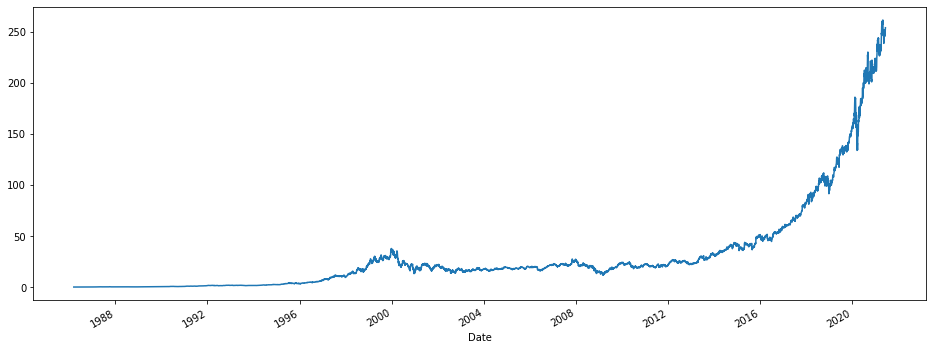

In [ ]:
# Plot the time series trend over time
msft_hist['Close'].plot(figsize=(16,6))

In [ ]:
# Get actions (dividends, splits)
msft.actions

,Dividends,Stock Splits
Date,,
1987-09-21,0.00,2.0
1990-04-16,0.00,2.0
1991-06-27,0.00,1.5
1992-06-15,0.00,1.5
1994-05-23,0.00,2.0
1996-12-09,0.00,2.0
1998-02-23,0.00,2.0
1999-03-29,0.00,2.0
2003-02-18,0.00,2.0


In [ ]:
# Get next events (earnings, etc.)
msft.calendar

,0,1
Earnings Date,2021-07-20 00:00:00,2021-07-26 00:00:00
Earnings Average,1.9,1.9
Earnings Low,1.64,1.64
Earnings High,2.03,2.03
Revenue Average,44105500000,44105500000
Revenue Low,40850000000,40850000000
Revenue High,45019500000,45019500000


In [ ]:
# Get yearly balance sheet
msft.balancesheet

,2020-06-30,2019-06-30,2018-06-30,2017-06-30
Intangible Assets,7.038000e+09,7.750000e+09,8.053000e+09,1.010600e+10
Total Liab,1.830070e+11,1.842260e+11,1.761300e+11,1.626010e+11
Total Stockholder Equity,1.183040e+11,1.023300e+11,8.271800e+10,8.771100e+10
Other Current Liab,4.600100e+10,4.586000e+10,3.819500e+10,3.087900e+10
Total Assets,3.013110e+11,2.865560e+11,2.588480e+11,2.503120e+11
Common Stock,8.055200e+10,7.852000e+10,7.122300e+10,6.931500e+10
Other Current Assets,1.151700e+10,1.013300e+10,6.855000e+09,5.183000e+09
Retained Earnings,3.456600e+10,2.415000e+10,1.368200e+10,1.776900e+10
Other Liab,3.449200e+10,3.569900e+10,3.570700e+10,2.298600e+10
Good Will,4.335100e+10,4.202600e+10,3.568300e+10,3.512200e+10


In [ ]:
# Get quarterly balance sheet
msft.quarterly_balance_sheet

,2021-03-31,2020-12-31,2020-09-30,2020-06-30
Intangible Assets,8.127000e+09,6.555000e+09,6.923000e+09,7.038000e+09
Total Liab,1.743740e+11,1.739010e+11,1.776090e+11,1.830070e+11
Total Stockholder Equity,1.345050e+11,1.302360e+11,1.233920e+11,1.183040e+11
Other Current Liab,4.006900e+10,3.992600e+10,4.299600e+10,4.600100e+10
Total Assets,3.088790e+11,3.041370e+11,3.010010e+11,3.013110e+11
Common Stock,8.230800e+10,8.189600e+10,8.108900e+10,8.055200e+10
Other Current Assets,1.203400e+10,1.274800e+10,1.357200e+10,1.151700e+10
Retained Earnings,5.073500e+10,4.497300e+10,3.919300e+10,3.456600e+10
Other Liab,3.160100e+10,3.158500e+10,3.317400e+10,3.449200e+10
Good Will,4.969800e+10,4.421900e+10,4.389000e+10,4.335100e+10


In [ ]:
# Get yearly financials
msft.financials

,2020-06-30,2019-06-30,2018-06-30,2017-06-30
Research Development,1.9269e+10,1.6876e+10,1.4726e+10,1.3037e+10
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,5.3036e+10,4.3688e+10,3.6474e+10,2.9901e+10
Minority Interest,None,None,None,None
Net Income,4.4281e+10,3.924e+10,1.6571e+10,2.5489e+10
Selling General Administrative,2.4709e+10,2.3098e+10,2.2223e+10,1.9942e+10
Gross Profit,9.6937e+10,8.2933e+10,7.2007e+10,6.231e+10
Ebit,5.2959e+10,4.2959e+10,3.5058e+10,2.9331e+10
Operating Income,5.2959e+10,4.2959e+10,3.5058e+10,2.9331e+10
Other Operating Expenses,None,None,None,None


In [ ]:
# Get quarterly financials
msft.quarterly_financials

,2021-03-31,2020-12-31,2020-09-30,2020-06-30
Research Development,5.204e+09,4.899e+09,4.926e+09,5.214e+09
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,1.7236e+10,1.8337e+10,1.6124e+10,1.3422e+10
Minority Interest,None,None,None,None
Net Income,1.5457e+10,1.5463e+10,1.3893e+10,1.1202e+10
Selling General Administrative,6.409e+09,6.086e+09,5.35e+09,7.073e+09
Gross Profit,2.8661e+10,2.8882e+10,2.6152e+10,2.5694e+10
Ebit,1.7048e+10,1.7897e+10,1.5876e+10,1.3407e+10
Operating Income,1.7048e+10,1.7897e+10,1.5876e+10,1.3407e+10
Other Operating Expenses,None,None,None,None


In [ ]:
# Get yearly financials
msft.cashflow

,2020-06-30,2019-06-30,2018-06-30,2017-06-30
Investments,6.980000e+09,5.400000e+08,6.557000e+09,-1.251100e+10
Change To Liabilities,5.230000e+09,4.694000e+09,7.070000e+09,3.901000e+09
Total Cashflows From Investing Activities,-1.222300e+10,-1.577300e+10,-6.061000e+09,-4.678100e+10
Net Borrowings,-5.518000e+09,-4.000000e+09,-1.020100e+10,3.145900e+10
Total Cash From Financing Activities,-4.603100e+10,-3.688700e+10,-3.359000e+10,8.408000e+09
Change To Operating Activities,-6.730000e+08,-1.542000e+09,-4.590000e+08,3.490000e+08
Issuance Of Stock,1.343000e+09,1.142000e+09,1.002000e+09,7.720000e+08
Net Income,4.428100e+10,3.924000e+10,1.657100e+10,2.548900e+10
Change In Cash,2.220000e+09,-5.900000e+08,4.283000e+09,1.153000e+09
Repurchase Of Stock,-2.296800e+10,-1.954300e+10,-1.072100e+10,-1.178800e+10


In [ ]:
# Get quarterly financials
msft.quarterly_cashflow

,2021-03-31,2020-12-31,2020-09-30,2020-06-30
Investments,2.517000e+09,2.593000e+09,2.100000e+09,3.173000e+09
Change To Liabilities,3.600000e+08,-3.194000e+09,-2.749000e+09,1.180200e+10
Total Cashflows From Investing Activities,-9.684000e+09,-1.669000e+09,-5.371000e+09,-4.462000e+09
Net Borrowings,-5.000000e+08,-3.250000e+09,-3.250000e+09,-3.250000e+09
Total Cash From Financing Activities,-1.319200e+10,-1.363400e+10,-1.028900e+10,-1.226200e+10
Change To Operating Activities,1.305000e+09,1.879000e+09,-2.823000e+09,6.430000e+08
Issuance Of Stock,3.960000e+08,3.020000e+08,5.450000e+08,3.400000e+08
Net Income,1.545700e+10,1.546300e+10,1.389300e+10,1.120200e+10
Change In Cash,-7.300000e+08,-2.773000e+09,3.629000e+09,1.866000e+09
Repurchase Of Stock,-6.930000e+09,-6.535000e+09,-6.743000e+09,-5.791000e+09


In [ ]:
# Get dividents
msft.dividends

Date
2003-02-19    0.08
2003-10-15    0.16
2004-08-23    0.08
2004-11-15    3.08
2005-02-15    0.08
2005-05-16    0.08
2005-08-15    0.08
2005-11-15    0.08
2006-02-15    0.09
2006-05-15    0.09
2006-08-15    0.09
2006-11-14    0.10
2007-02-13    0.10
2007-05-15    0.10
2007-08-14    0.10
2007-11-13    0.11
2008-02-19    0.11
2008-05-13    0.11
2008-08-19    0.11
2008-11-18    0.13
2009-02-17    0.13
2009-05-19    0.13
2009-08-18    0.13
2009-11-17    0.13
2010-02-16    0.13
2010-05-18    0.13
2010-08-17    0.13
2010-11-16    0.16
2011-02-15    0.16
2011-05-17    0.16
2011-08-16    0.16
2011-11-15    0.20
2012-02-14    0.20
2012-05-15    0.20
2012-08-14    0.20
2012-11-13    0.23
2013-02-19    0.23
2013-05-14    0.23
2013-08-13    0.23
2013-11-19    0.28
2014-02-18    0.28
2014-05-13    0.28
2014-08-19    0.28
2014-11-18    0.31
2015-02-17    0.31
2015-05-19    0.31
2015-08-18    0.31
2015-11-17    0.36
2016-02-16    0.36
2016-05-17    0.36
2016-08-16    0.36
2016-11-15    0.39
2017-02

In [ ]:
# Get earningns
msft.earnings

,Revenue,Earnings
Year,,
2017,96571000000,25489000000
2018,110360000000,16571000000
2019,125843000000,39240000000
2020,143015000000,44281000000


In [ ]:
# Get history
msft.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-05-10,250.292051,251.150071,246.550691,246.610550,29299900,0.00,0
2021-05-11,243.986613,246.031893,242.011178,245.662735,33641600,0.00,0
2021-05-12,241.612097,243.817013,237.521552,238.449402,36684400,0.00,0
2021-05-13,241.242946,245.034195,240.863817,242.470108,29624300,0.00,0
2021-05-14,245.014237,248.605934,244.924448,247.578308,23868600,0.00,0
2021-05-17,245.982012,246.021913,242.958994,244.615158,24970200,0.00,0
2021-05-18,245.702658,245.842335,242.340411,242.520004,20168000,0.00,0
2021-05-19,239.309998,243.229996,238.600006,243.119995,25739800,0.56,0
2021-05-20,243.960007,247.949997,243.860001,246.479996,21800700,0.00,0


In [ ]:
# Get major holders
msft.major_holders.sort_values(0, ascending=False)

,0,1
2,72.36%,% of Float Held by Institutions
1,72.31%,% of Shares Held by Institutions
3,5320,Number of Institutions Holding Shares
0,0.07%,% of Shares Held by All Insider


In [ ]:
# Get instituional holders
msft.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",610849992,2021-03-30,0.0811,144020102613
1,Blackrock Inc.,518649291,2021-03-30,0.0689,122281943339
2,State Street Corporation,292575655,2021-03-30,0.0388,68980562179
3,"FMR, LLC",217585928,2021-03-30,0.0289,51300234244
4,Price (T.Rowe) Associates Inc,178824616,2021-03-30,0.0237,42161479714
5,"Geode Capital Management, LLC",120231394,2021-03-30,0.0160,28346955763
6,Capital World Investors,112150578,2021-03-30,0.0149,26441741775
7,Capital Research Global Investors,99286940,2021-03-30,0.0132,23408881843
8,Capital International Investors,90228967,2021-03-30,0.0120,21273283549
9,Northern Trust Corporation,89762724,2021-03-30,0.0119,21163357437


In [ ]:
# Get mutual funds holders
msft.mutualfund_holders

,Holder,Shares,Date Reported,% Out,Value
0,Vanguard Total Stock Market Index Fund,212622731,2021-03-30,0.0282,50130061287
1,Vanguard 500 Index Fund,154447541,2021-03-30,0.0205,36414096741
2,SPDR S&P 500 ETF Trust,78233730,2021-03-30,0.0104,18445166522
3,Fidelity 500 Index Fund,69051172,2021-03-30,0.0092,16280194822
4,"Invesco ETF Tr-Invesco QQQ Tr, Series 1 ETF",62071157,2021-03-30,0.0082,14634516685
5,Vanguard Institutional Index Fund-Institutional Index Fund,60265311,2021-03-30,0.0080,14208752374
6,iShares Core S&P 500 ETF,58593717,2021-03-30,0.0078,13814640657
7,Vanguard Growth Index Fund,58592382,2021-03-30,0.0078,13814325904
8,Growth Fund Of America Inc,54525474,2021-03-30,0.0072,12855471004
9,Washington Mutual Investors Fund,32883928,2021-03-30,0.0044,7753043704


In [ ]:
# Get ISIN code *experimental
# ISIN = International Securities Identification Number
msft.isin

'US5949181045'

In [ ]:
# Get options expirations
msft.options

('2021-06-11',
 '2021-06-18',
 '2021-06-25',
 '2021-07-02',
 '2021-07-09',
 '2021-07-16',
 '2021-07-23',
 '2021-08-20',
 '2021-09-17',
 '2021-10-15',
 '2021-11-19',
 '2022-01-21',
 '2022-03-18',
 '2022-06-17',
 '2022-09-16',
 '2023-01-20',
 '2023-03-17',
 '2023-06-16')

In [ ]:
# Get option chain for specific expiration
# opt = msft.option_chain('YYYY-MM-DD')
opt = msft.option_chain()

In [ ]:
# Get option calls
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,MSFT210611C00125000,2021-05-27 18:15:06,125.0,124.95,126.50,129.75,0.000000,0.000000,NaN,1,3.333009,True,REGULAR,USD
1,MSFT210611C00135000,2021-06-02 16:23:03,135.0,112.50,116.50,119.75,0.000000,0.000000,1.0,9,3.010745,True,REGULAR,USD
2,MSFT210611C00140000,2021-06-04 15:24:28,140.0,110.95,111.50,114.75,0.000000,0.000000,10.0,32,2.858401,True,REGULAR,USD
3,MSFT210611C00145000,2021-06-02 13:50:31,145.0,103.60,106.50,109.75,0.000000,0.000000,2.0,12,2.710941,True,REGULAR,USD
4,MSFT210611C00150000,2021-06-01 17:44:38,150.0,97.89,101.50,104.20,0.000000,0.000000,2.0,9,2.210942,True,REGULAR,USD
5,MSFT210611C00155000,2021-06-02 15:22:10,155.0,93.50,96.50,99.75,0.000000,0.000000,9.0,14,2.428715,True,REGULAR,USD
6,MSFT210611C00160000,2021-06-02 16:00:57,160.0,88.05,91.50,94.75,0.000000,0.000000,6.0,14,2.293950,True,REGULAR,USD
7,MSFT210611C00165000,2021-06-02 16:27:11,165.0,82.30,86.50,89.75,0.000000,0.000000,32.0,33,2.163091,True,REGULAR,USD
8,MSFT210611C00170000,2021-06-04 15:25:09,170.0,80.95,81.50,84.75,0.000000,0.000000,20.0,44,2.035161,True,REGULAR,USD
9,MSFT210611C00175000,2021-06-02 14:11:48,175.0,73.25,76.50,79.75,0.000000,0.000000,31.0,55,1.911133,True,REGULAR,USD


In [ ]:
# Get option puts
opt.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,MSFT210611P00130000,2021-05-17 04:01:04,130.0,0.05,0.00,0.02,0.000000,0.000000,NaN,6,1.843751,False,REGULAR,USD
1,MSFT210611P00135000,2021-05-17 04:01:04,135.0,0.05,0.00,0.02,0.000000,0.000000,NaN,5,1.750001,False,REGULAR,USD
2,MSFT210611P00140000,2021-06-04 13:30:30,140.0,0.02,0.00,0.02,0.000000,0.000000,1.0,110,1.656252,False,REGULAR,USD
3,MSFT210611P00145000,2021-06-02 13:30:12,145.0,0.01,0.00,0.02,0.000000,0.000000,1.0,1,1.562502,False,REGULAR,USD
4,MSFT210611P00150000,2021-05-20 15:51:58,150.0,0.06,0.00,0.01,0.000000,0.000000,12.0,14,1.375003,False,REGULAR,USD
5,MSFT210611P00155000,2021-05-20 15:48:29,155.0,0.07,0.00,0.02,0.000000,0.000000,4.0,5,1.375003,False,REGULAR,USD
6,MSFT210611P00160000,2021-05-20 16:01:40,160.0,0.08,0.00,0.02,0.000000,0.000000,29.0,31,1.296879,False,REGULAR,USD
7,MSFT210611P00165000,2021-05-19 13:30:12,165.0,0.07,0.00,0.02,0.000000,0.000000,2.0,2,1.218754,False,REGULAR,USD
8,MSFT210611P00170000,2021-06-04 19:51:45,170.0,0.01,0.00,0.01,0.000000,0.000000,50.0,233,1.062505,False,REGULAR,USD
9,MSFT210611P00175000,2021-06-04 19:51:51,175.0,0.01,0.00,0.01,0.000000,0.000000,50.0,228,1.000005,False,REGULAR,USD


In [ ]:
# Get sustainability scores
msft.sustainability

,Value
2021-5,
palmOil,False
controversialWeapons,False
gambling,False
socialScore,9.37
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False


In [ ]:
msft.get_recommendations()

,Firm,To Grade,From Grade,Action
Date,,,,
2012-03-16 08:19:00,Argus Research,Buy,,up
2012-03-19 14:00:00,Hilliard Lyons,Long-Term Buy,,main
2012-03-22 07:03:00,Morgan Stanley,Overweight,,main
2012-04-03 11:53:00,UBS,Buy,,main
2012-04-20 06:18:00,Deutsche Bank,Buy,,main
2012-04-20 06:44:00,Goldman Sachs,Neutral,,main
2012-04-20 07:05:00,Bank oferica,Buy,,main
2012-04-20 11:51:00,UBS,Buy,,main
2012-04-20 12:28:00,McAdams Wright Ragen,Buy,,main


### Multiple Tickers

In [ ]:
import yfinance as yf

tickers = yf.Tickers('msft aapl goog')
# ^ returns a named tuple of Ticker objects

# access each ticker using (example)
tickers.tickers.MSFT.info
tickers.tickers.AAPL.history(period="1mo")
tickers.tickers.GOOG.actions

AttributeError: ignored

### Download Data

In [ ]:
def download_data(ticker, start_date, end_date):
    stock = yf.download(ticker, start=start_date, end=end_date)
    stock.insert(0, "Ticker", ticker.upper())
    stock.to_csv('{}_{}.csv'.format(ticker, datetime.today().date()))
    return stock.head()

In [ ]:
download_data('aapl', "2021-01-01", "2021-05-08")

In [ ]:
apple = yf.download("AAPL", start='2021-01-01', end="2021-05-08")

In [ ]:
apple

In [ ]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "SPY AAPL MSFT",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "ytd",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  3 of 3 completed


In [ ]:
data

MSFT                                                \
                  Open        High         Low       Close    Volume   
Date                                                                   
2021-01-04  221.507173  221.975014  213.822655  216.689423  37130100   
2021-01-05  216.261380  217.515598  214.708553  216.898438  23823000   
2021-01-06  211.194780  215.494931  210.965841  211.274414  35930700   
2021-01-07  213.056186  218.331828  212.727716  217.286652  27694500   
2021-01-08  217.674868  219.566144  216.032458  218.610550  22956200   
2021-01-11  217.465832  217.903813  215.733825  216.490341  23031300   
2021-01-12  215.504884  216.102132  212.339508  213.942093  23249300   
2021-01-13  213.036298  215.763695  212.946700  215.345627  20087100   
2021-01-14  214.917594  216.460473  211.762167  212.040878  29480800   
2021-01-15  212.538588  213.524028  211.055432  211.672577  31746500   
2021-01-19  212.767537  215.982686  211.652690  215.445175  30480900   
2021-01-20  216.699373  224.752185  216.291254  223.308853  37777300   
2021-01-21  223.667196  225.259848  221.397677  223.935959  30709400   
2021-01-22  226.036264  229.012527  224.762149  224.911453  30172700   
2021-01-25  228.066872  228.723842  223.189400  228.474991  33152100   
2021-01-26  230.794290  233.103618  229.022473  231.262131  49169600   
2021-01-27  236.906078  239.334866  229.082205  231.829514  69870600   
2021-01-28  234.527055  241.524741  234.009441  237.831787  49111200   
2021-01-29  234.905320  236.925988  230.286648  230.893845  42503100   
2021-02-01  233.979578  241.385384  231.361662  238.548477  33314200   
2021-02-02  240.190900  241.196252  237.592896  238.409119  25916300   
2021-02-03  238.468860  243.963477  238.160272  241.883087  27158100   
2021-02-04  241.544650  242.121986  239.265167  240.897629  25296100   
2021-02-05  241.116622  242.161799  239.314944  241.086761  18054800   
2021-02-08  242.032397  242.559960  239.703156  241.355530  22211900   
2021-02-09  240.758260  243.634976  240.270522  242.649536  23565000   
2021-02-10  243.873891  244.789661  239.782782  241.703918  22186700   
2021-02-11  243.654902  244.023196  241.036985  243.366241  15751100   
2021-02-12  242.808797  244.172510  241.614315  243.863937  16561100   
2021-02-16  243.903753  244.998703  241.803451  242.579865  26728500   
2021-02-17  240.764066  243.747168  240.384936  243.637421  21653500   
2021-02-18  241.242942  243.368025  240.305105  243.228348  16925600   
2021-02-19  243.188450  243.298197  239.626667  240.414856  25262600   
2021-02-22  236.873042  237.381861  231.864602  233.969742  36446900   
2021-02-23  229.799376  234.289009  228.203056  232.732605  30228700   
2021-02-24  229.480109  234.658155  228.472442  234.009659  26339700   
2021-02-25  231.545341  234.049553  227.355020  228.462463  39542200   
2021-02-26  230.996602  234.827752  229.011181  231.844650  37819200   
2021-03-01  235.356537  236.922928  232.612873  236.394150  25324000   
2021-03-02  236.463973  236.753313  232.912177  233.331207  22812500   
2021-03-03  231.625160  233.041887  226.736439  227.035751  34029500   
2021-03-04  226.217644  231.954397  223.743346  226.207657  44727800   
2021-03-05  228.991242  232.732603  225.938294  231.066452  41872800   
2021-03-08  230.836977  232.832369  226.606754  226.866150  35267400   
2021-03-09  232.343504  234.837745  231.136285  233.241425  33080500   
2021-03-10  236.454002  236.454002  231.505423  231.884552  29746800   
2021-03-11  234.418711  238.619003  233.770199  236.583710  29907600   
2021-03-12  233.470882  235.276725  232.692680  235.206879  22653700   
2021-03-15  234.418707  234.648172  231.275954  234.269043  26034900   
2021-03-16  235.735655  239.506946  235.396442  237.162369  28092200   
2021-03-17  235.605963  238.000443  232.692691  236.493912  29562100   
2021-03-18  232.024234  233.650484  229.799376  230.188477  34833000   
2021-03-19  230.487791  231.934447  228.821640  229.819336

# Parking Lot

In [ ]:

# Raw Package
import numpy as np
import pandas as pd

#Data Source
import yfinance as yf

#Data viz
import plotly.graph_objs as go

#Interval required 1 minute
data = yf.download(tickers='TSLA', period='30d', interval='1d')

#declare figure
fig = go.Figure()

#Candlestick
fig.add_trace(go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'], name = 'market data'))

# Add titles
fig.update_layout(
    title='TESLA live share price evolution',
    yaxis_title='Stock Price (USD per Shares)')

# X-Axes
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=15, label="15m", step="minute", stepmode="backward"),
            dict(count=45, label="45m", step="minute", stepmode="backward"),
            dict(count=1, label="HTD", step="hour", stepmode="todate"),
            dict(count=3, label="3h", step="hour", stepmode="backward"),
            dict(step="all")
        ])
    )
)

#Show
fig.show()

[*********************100%***********************]  1 of 1 completed
